## Importing the required libraries

In [38]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

Creating variables/dictionaries for the accessibility purpose

In [39]:
# Translations and mapping dictionaries
LANG = 'en' # 'de' 'en'

if LANG == 'en':
    MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # titles / labels 
    T_AGE = 'Age'
    T_AGE_GRP = 'Age group'
    T_ALL = 'All'
    T_AND = 'and'
    T_DEATHS = 'Deaths'
    T_DEATHS_BC = 'Deaths before Covid19 (monthly average)'
    T_DEATHS_BY_AGE = 'Deaths by Age (monthly average)'
    T_DEATHS_BY_STATE = 'Deaths by State (monthly average)'
    T_DEATHS_C = 'Deaths during Covid19 (monthly average)'
    T_DEATHS_MONTHLY = 'Deaths (monthly average)'
    T_DEATHS_HTH = 'Deaths per 100,000 (monthly average)'
    T_DENSITY = 'Population per km\xb2'
    T_DENSITY2 = 'Population density'
    T_MEASURE = 'Measure'
    T_MONTH = 'Month'
    T_MORT_INC = 'Increased mortality'
    T_PERIOD = 'Period'
    T_PERIOD_SPLIT = 'Split of the Periods'
    T_PER_HTH = 'per 100,000'
    T_STATE = 'State'
    T_STATE_MEASURES = ['Deaths', 'Deaths per 100,000']
    
elif LANG == 'de':
    MONTHS = ['Jan', 'Feb', 'Mrz', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    
    # titels / labels
    T_AGE = 'Alter'
    T_AGE_GRP = 'Altersgruppe'
    T_ALL = 'Alle'
    T_AND = 'und'
    T_DEATHS = 'Todesfälle'
    T_DEATHS_BC = 'Tote vor Covid19 (monatl. \xd8)'
    T_DEATHS_BY_AGE = 'Todesfälle nach Alter (monatl. \xd8)'
    T_DEATHS_BY_STATE = 'Todesfälle nach Bundesland (monatl. \xd8)'
    T_DEATHS_C = 'Tote seit Covid19 (monatl. \xd8)'
    T_DEATHS_MONTHLY = 'Todesfälle (monatl. \xd8)'
    T_DEATHS_HTH = 'Tote je 100.000 Einwohner (monatl. \xd8)'
    T_DENSITY = 'Einwohner je km\xb2'
    T_DENSITY2 = 'Bevölkerungsdichte'
    T_MEASURE = 'Kennzahl'
    T_MONTH = 'Monat'
    T_MORT_INC = 'Zunahme der Todesfälle'
    T_PERIOD = 'Zeitraum'
    T_PERIOD_SPLIT = 'Aufteilung der Zeiträume'
    T_PER_HTH = 'je 100.000'
    T_STATE = 'Bundesland'
    T_STATE_MEASURES = ['Todesfälle', 'Tote je 100.000']

AGE_MAP = {'0-15' : 15, 
           '15-30' : 30, 
           '30-35' : 35, 
           '35-40' : 40, 
           '40-45' : 45, 
           '45-50' : 50, 
           '50-55' : 55, 
           '55-60' : 60,
           '60-65' : 65, 
           '65-70' : 70, 
           '70-75' : 75, 
           '75-80' : 80, 
           '80-85' : 85, 
           '85-90' : 90, 
           '90-95' : 95,
           '95+' : 100,
           '0-65' : 65,
           '65+': 100}

# Temp_1 = ['0-15', '15-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '75-80', '80-85', '85-90', '90-95', '95+', '0-65', '65+' ]
# Temp_2 = [15, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 65, 100]

# AGE_MAP = {Temp_1[i]:Temp_2[i] for i in range(len(Temp_1))}

STATE_MAP = {'Schleswig-Holstein': 'SH', 
             'Hamburg': 'HH', 
             'Niedersachsen': 'NI', 
             'Bremen': 'HB',
             'Nordrhein-Westfalen': 'NW', 
             'Hessen':'HE', 
             'Rheinland-Pfalz': 'RP',
             'Baden-Württemberg': 'BW', 
             'Bayern': 'BY', 
             'Saarland': 'SL', 
             'Berlin': 'BE', 
             'Brandenburg': 'BB', 
             'Mecklenburg-Vorpommern': 'MV',
             'Sachsen': 'SN',
             'Sachsen-Anhalt': 'ST',
             'Thüringen': 'TH'
}

Here, we read the data from the particular sheet of EXCEL file
1. 'header' argument provide the reading of data from the specified row(Assuming indexing from 0)<br/>
    In this case it's 8th Row.
2. 'index_col' argument provide the reading of data from the specified column(Assuming indexing from 0)<br/>
    In this case it's 0th Column.
3. 'engine' argument is an optional. It works fine without it.

In [40]:
# Reading raw data
data_in = pd.read_excel(io = "Dataset/sonderauswertung-sterbefaelle.xlsx", sheet_name = 'D_2016-2021_Monate_AG_Ins', 
                        header = 8, index_col = 0, engine='openpyxl')
display(data_in)

,Unnamed: 1,unter … Jahren,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Unnamed: 15
Nr.,,,,,,,,,,,,,,,
1,2021,Insgesamt,105792,81603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2016,75-80,12388,11644,12850.0,11600.0,11181.0,10740.0,10957.0,10844.0,10483.0,11566.0,11709.0,12805.0,138767.0
99,2016,80-85,13721,12988,14230.0,12632.0,12915.0,11729.0,12264.0,12238.0,11770.0,13147.0,13534.0,14704.0,155872.0
100,2016,85-90,15688,14556,15697.0,14250.0,13977.0,12588.0,13338.0,13145.0,12929.0,14189.0,14629.0,16123.0,171109.0


1. The 'drop' method here drop out the entire column/row by mentioning the column/row name.
2. The argument 'axis' here decides whether the operation should be on column or row. (i.e., For Row axis=0 & For Column axis=1)
3. Also, the method 'reset_index' removes the current indexing column and reset it.

Here the last column which are unnamed are get dropped out because those are not needed for the further classification.

In [41]:
data_in = data_in.drop(['Unnamed: 15'], axis = 1).reset_index(drop=True)
display(data_in.head())

,Unnamed: 1,unter … Jahren,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
0,2021,Insgesamt,105792,81603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After removing the unnecessary columns, here we did assign the proper column names

In [42]:
data_in.columns = ['year', 'age'] + MONTHS
display(data_in.head())

,year,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2021,Insgesamt,105792,81603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The word 'Insgesamt' in 'age' Column, here denotes the summation of all deaths over all age groups in that particular month of the year.<br/>
Hence, removing the row indicating the summation.

In [43]:
data_in = data_in[data_in.age != 'Insgesamt'].reset_index(drop=True)
display(data_in)

,year,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,40-45,515,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016,75-80,12388,11644,12850.0,11600.0,11181.0,10740.0,10957.0,10844.0,10483.0,11566.0,11709.0,12805.0
92,2016,80-85,13721,12988,14230.0,12632.0,12915.0,11729.0,12264.0,12238.0,11770.0,13147.0,13534.0,14704.0
93,2016,85-90,15688,14556,15697.0,14250.0,13977.0,12588.0,13338.0,13145.0,12929.0,14189.0,14629.0,16123.0
94,2016,90-95,11244,10304,11333.0,10022.0,9818.0,8960.0,9401.0,9243.0,9004.0,10221.0,10446.0,11830.0


Replacing the string 'u. mehr' with '+' for the further mapping of age groups.

In [44]:
# clean age column
data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')
display(data_in)

C:\Users\skkha\AppData\Local\Temp/ipykernel_12032/2869770409.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')


,year,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,40-45,515,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016,75-80,12388,11644,12850.0,11600.0,11181.0,10740.0,10957.0,10844.0,10483.0,11566.0,11709.0,12805.0
92,2016,80-85,13721,12988,14230.0,12632.0,12915.0,11729.0,12264.0,12238.0,11770.0,13147.0,13534.0,14704.0
93,2016,85-90,15688,14556,15697.0,14250.0,13977.0,12588.0,13338.0,13145.0,12929.0,14189.0,14629.0,16123.0
94,2016,90-95,11244,10304,11333.0,10022.0,9818.0,8960.0,9401.0,9243.0,9004.0,10221.0,10446.0,11830.0


Mapping the current age group based on the previously defined AGE_MAP dictionary and creating a new column.

In [45]:
# define upper bound of age range
data_in['age_to'] = data_in['age'].map(AGE_MAP)
display(data_in)

,year,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to
0,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
2,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
3,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
4,2021,40-45,515,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016,75-80,12388,11644,12850.0,11600.0,11181.0,10740.0,10957.0,10844.0,10483.0,11566.0,11709.0,12805.0,80
92,2016,80-85,13721,12988,14230.0,12632.0,12915.0,11729.0,12264.0,12238.0,11770.0,13147.0,13534.0,14704.0,85
93,2016,85-90,15688,14556,15697.0,14250.0,13977.0,12588.0,13338.0,13145.0,12929.0,14189.0,14629.0,16123.0,90
94,2016,90-95,11244,10304,11333.0,10022.0,9818.0,8960.0,9401.0,9243.0,9004.0,10221.0,10446.0,11830.0,95


We are creating a new dataframe here, by grouping the MONTHS columns on ['year', 'age', 'age_to'] columns<br/>
Along with dropping the 'NaN' values.

In [46]:
data = data_in.melt(id_vars=['year', 'age', 'age_to'] , value_vars = MONTHS).dropna()
display(data)

,year,age,age_to,variable,value
0,2021,0-15,15,Jan,289.0
1,2021,15-30,30,Jan,286.0
2,2021,30-35,35,Jan,232.0
3,2021,35-40,40,Jan,322.0
4,2021,40-45,45,Jan,515.0
...,...,...,...,...,...
1147,2016,75-80,80,Dec,12805.0
1148,2016,80-85,85,Dec,14704.0
1149,2016,85-90,90,Dec,16123.0
1150,2016,90-95,95,Dec,11830.0


Renaming the columns of newly created dataframe.

In [47]:
data.columns = ['year', 'age', 'age_to', 'month', 'deaths']
display(data)

,year,age,age_to,month,deaths
0,2021,0-15,15,Jan,289.0
1,2021,15-30,30,Jan,286.0
2,2021,30-35,35,Jan,232.0
3,2021,35-40,40,Jan,322.0
4,2021,40-45,45,Jan,515.0
...,...,...,...,...,...
1147,2016,75-80,80,Dec,12805.0
1148,2016,80-85,85,Dec,14704.0
1149,2016,85-90,90,Dec,16123.0
1150,2016,90-95,95,Dec,11830.0


We know that we had the data from January 2016 to Feb 2021(i.e., Totally 4 Year 2 Months of Data).<br/>
Hence dropping the data of first two months of 2016 which gives us a continuous full data of 4 Year.

In [48]:
# drop January and February 2016 to get four full years
data = data[(data['year']>2016) | (data['month'].isin(MONTHS[2:]))].reset_index(drop=True)
display(data)

,year,age,age_to,month,deaths
0,2021,0-15,15,Jan,289.0
1,2021,15-30,30,Jan,286.0
2,2021,30-35,35,Jan,232.0
3,2021,35-40,40,Jan,322.0
4,2021,40-45,45,Jan,515.0
...,...,...,...,...,...
955,2016,75-80,80,Dec,12805.0
956,2016,80-85,85,Dec,14704.0
957,2016,85-90,90,Dec,16123.0
958,2016,90-95,95,Dec,11830.0


Here, we will divide the dataframe into two categories i.e.,Deaths Before Covid and After Covid .<br/>
And create a new column depicting it.

In [49]:
data['period'] = '2020/Mar - 2021/Feb'
data.loc[(data.year < 2020) | ((data.year == 2020) & (data.month.isin(['Jan', 'Feb']))), 'period'] = '2016/Mar - 2020/Feb'
display(data)

,year,age,age_to,month,deaths,period
0,2021,0-15,15,Jan,289.0,2020/Mar - 2021/Feb
1,2021,15-30,30,Jan,286.0,2020/Mar - 2021/Feb
2,2021,30-35,35,Jan,232.0,2020/Mar - 2021/Feb
3,2021,35-40,40,Jan,322.0,2020/Mar - 2021/Feb
4,2021,40-45,45,Jan,515.0,2020/Mar - 2021/Feb
...,...,...,...,...,...,...
955,2016,75-80,80,Dec,12805.0,2016/Mar - 2020/Feb
956,2016,80-85,85,Dec,14704.0,2016/Mar - 2020/Feb
957,2016,85-90,90,Dec,16123.0,2016/Mar - 2020/Feb
958,2016,90-95,95,Dec,11830.0,2016/Mar - 2020/Feb


Until here, we had successfully filtered out our dataset and Now we will visualise it with the help of 'Altair' python package

In [50]:
alt.Chart(data).mark_rect().encode(
    x=alt.X('month:N', sort=MONTHS, title='Months'),
    y=alt.Y('year:N', title='Years'),
    color=alt.Color('period', legend=alt.Legend(title=T_PERIOD))
).properties(title = T_PERIOD_SPLIT, width=580, height=350)

alt.Chart(...)

In [51]:
data2 = data.groupby(['period', 'age_to']).mean().reset_index()

Visualization Graph 1

d:\Python\General_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


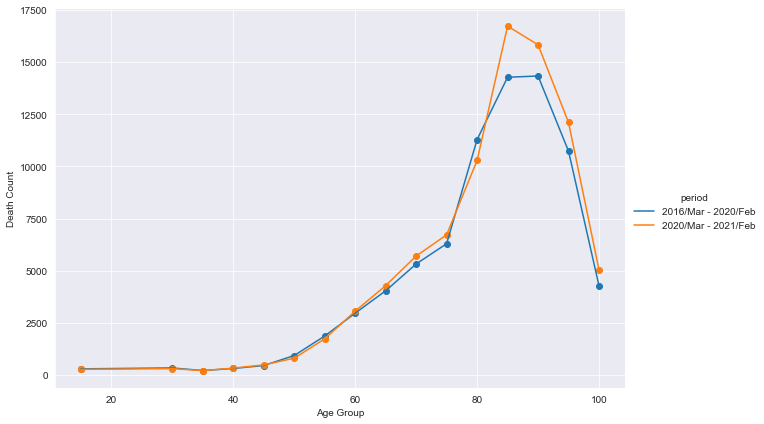

In [52]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data2, hue="period", size=6, aspect=1.5)
g.map(plt.scatter, "age_to", "deaths")
g.map(plt.plot, "age_to", "deaths")
g.add_legend()
g.set(xlabel='Age Group', ylabel='Death Count')
g.set_titles('Death By Age (Monthly Average)')

Visualization Graph 2

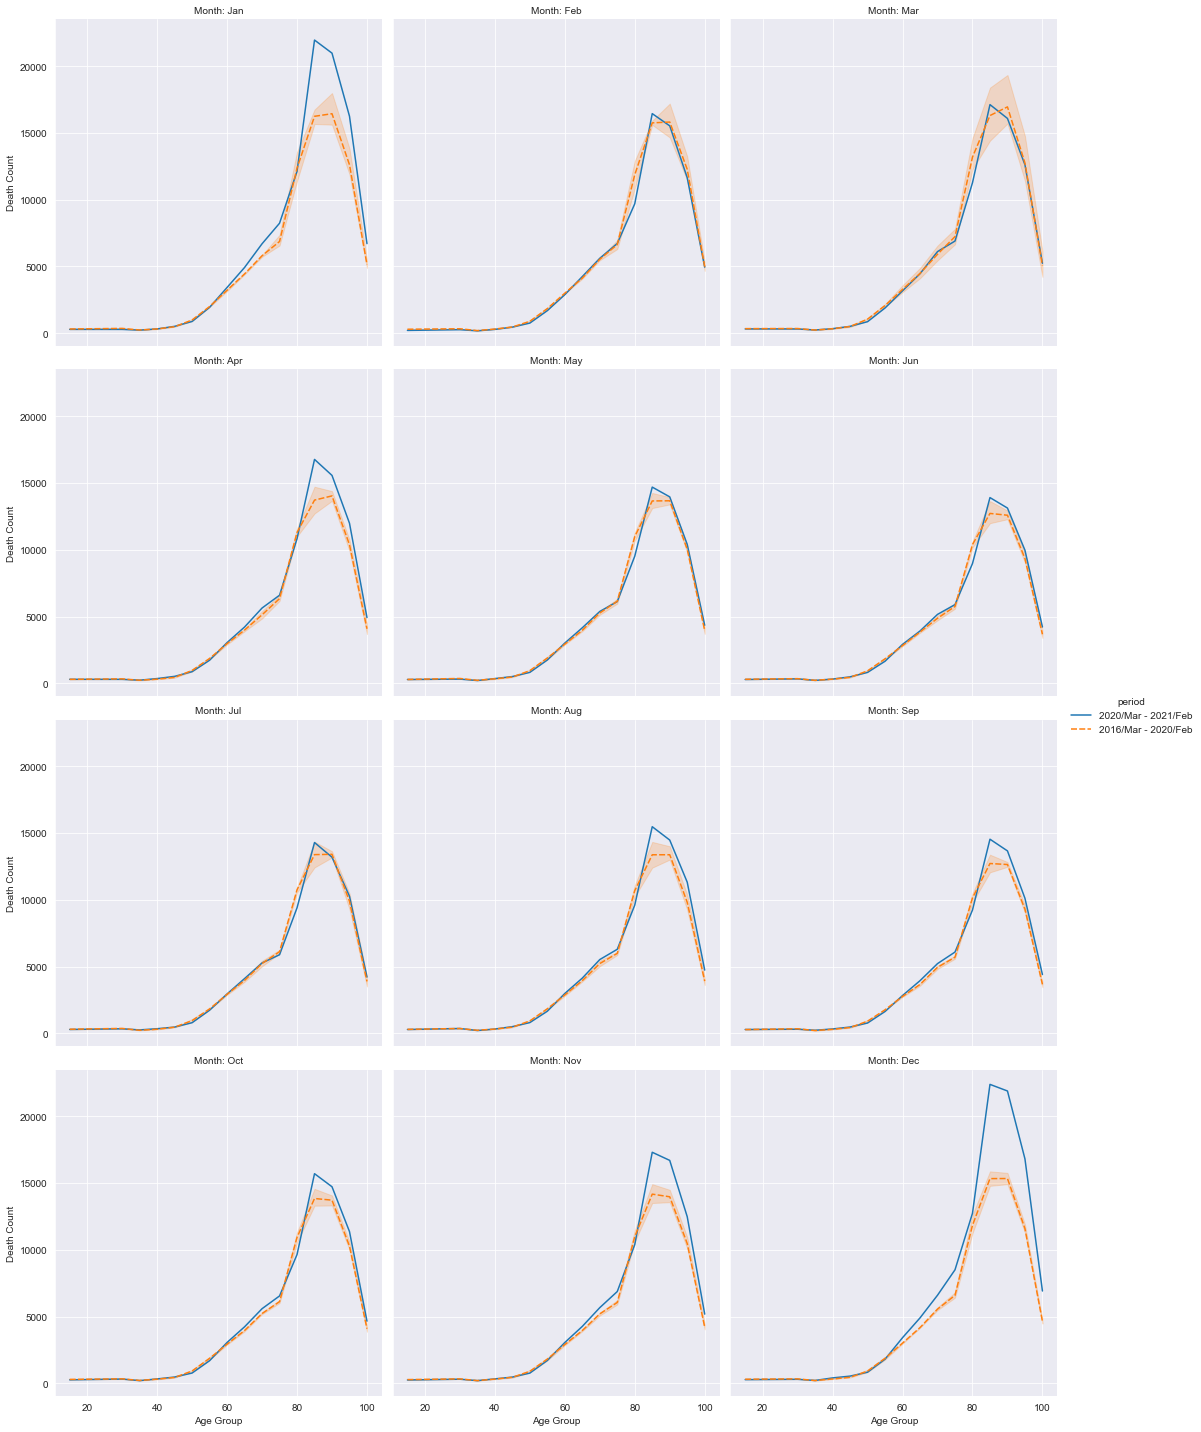

In [53]:
(sns.relplot(x='age_to', y='deaths',
             hue='period', col = 'month', col_wrap=3,
             sizes=(.5, 1, 1.5),
             style='period', kind='line', data=data)
.set(xlabel='Age Group', ylabel='Death Count')
.set_titles('Month: {col_name}'))

In [54]:
data1 = data.groupby('month')['deaths'].sum()
data1.columns=['Month', 'Total_Death']
data1 = data1.to_frame().reset_index()
display(data1)

,month,deaths
0,Apr,389336.0
1,Aug,373298.0
2,Dec,438905.0
3,Feb,419125.0
4,Jan,457322.0
5,Jul,369873.0
6,Jun,353810.0
7,Mar,447949.0
8,May,376343.0
9,Nov,391208.0


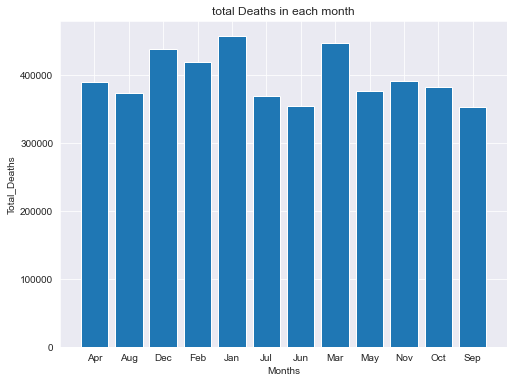

In [55]:
# Relation Between Total death in each month.
x = data1['month']
y = data1['deaths']
plt.figure(figsize=(8,6))
plt.bar(x,y);
plt.xlabel("Months")
plt.ylabel("Total_Deaths")
plt.title("total Deaths in each month");

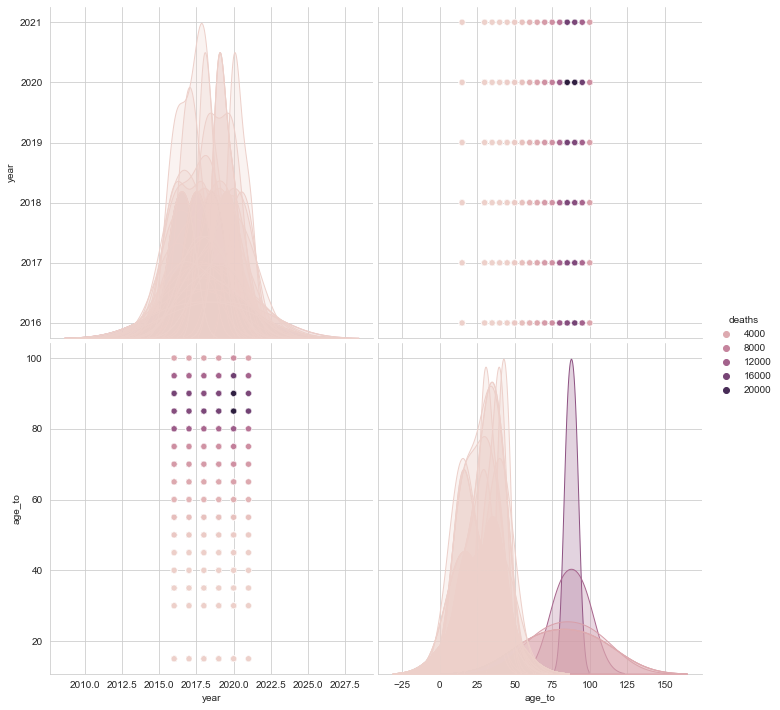

In [56]:
# Relation between diffrenet Columns with respect to deaths
sns.set_style('whitegrid')
sns.pairplot(data, hue='deaths', height=5)
plt.show()

In [57]:
deaths_per_age = data.groupby('age_to')['deaths'].sum()
deaths_per_age = deaths_per_age.to_frame().reset_index()
display(deaths_per_age)

,age_to,deaths
0,15,17864.0
1,30,20419.0
2,35,13270.0
3,40,19378.0
4,45,28018.0
5,50,54970.0
6,55,110922.0
7,60,179378.0
8,65,245594.0
9,70,324187.0


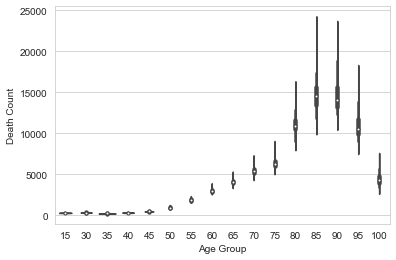

In [58]:
# Plot between age and death
(sns.violinplot(x='age_to', y='deaths', data=data)
.set(xlabel='Age Group', ylabel='Death Count'))
plt.show()

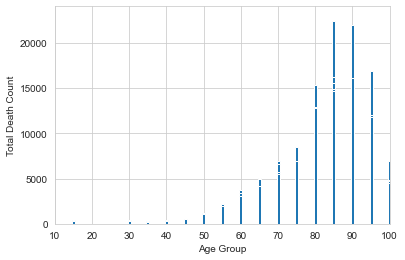

In [59]:
x = data['age_to'] 
y = data['deaths'] 
plt.bar(x,y)
plt.xlabel("Age Group")
plt.ylabel("Total Death Count")
plt.axis([10, 100, 0, 24000]);

From the above two graph it is evident that mortality increases drastically from age 80 onwardsbut after age 90 mortality rate starts decreasing

## Deaths By States

| File | Sheet Name | Represents |
| :---: | :---: | :---: |
| sonderauswertung-sterbefaelle.xlsx | D_2016-2021_Monate_AG_Ins | Deaths per age group in each months |
|  | BL_2016_2021_Monate_AG_Ins | Deaths per states in each months |
| 02-bundeslaender.xlsx | Bundesländer_mit_Hauptstädten | Population and Population density by state |

In [60]:
# Loading Sheet having deaths registered by the states.
data_in = pd.read_excel(io = "Dataset/sonderauswertung-sterbefaelle.xlsx", 
                        sheet_name = 'BL_2016_2021_Monate_AG_Ins', 
                        header = 8, 
                        index_col = 0,
                        engine='openpyxl')

# Droping out the unnecessary columns.
data_in = data_in.drop(['Unnamed: 16'], axis = 1)

# Renaming the columns.
data_in.columns = ['year', 'state', 'age'] + MONTHS

# Dropping the rows with summation values which is denoted by 'Insgesamt' here.
data_in = data_in[data_in.age != 'Insgesamt'].reset_index(drop=True)

# Cleaning the data according to our need
data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')

# Creating a new column for age group i.e. By mapping the dictionary which is already created.
data_in['age_to'] = data_in['age'].map(AGE_MAP)

# Same operration for the state column.
# Creating a new column for state abbrevation i.e. By mapping the dictionary which is already created.
data_in['state_abbrv'] = data_in['state'].map(STATE_MAP)
display(data_in.head(2))



C:\Users\skkha\AppData\Local\Temp/ipykernel_12032/2258087800.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')


,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to,state_abbrv
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,SH
1,2021,Schleswig-Holstein,65+,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,SH


In [61]:
# Load sheet having deaths as per population and population density by state
data_pop = pd.read_excel(io = "Dataset/02-bundeslaender.xlsx", 
                         sheet_name = 'Bundesländer_mit_Hauptstädten', 
                         header = 4, 
                         engine='openpyxl')

# Droping out the unnecessary columns and also cleaning the NAN values.
data_pop = data_pop[data_pop['Unnamed: 0'].notna()][['Unnamed: 0', 'Unnamed: 2', 'insgesamt', 'je km2']]

# Specifying names for the columns.
data_pop.columns = ['state', 'sq_km', 'population', 'pop_density']

# Slicing the values to discard the unwanted part.
data_pop['state'] = data_pop['state'].str.slice(start=4)

# Retaining only the states which are present in the dataset.
data_pop = data_pop[data_pop['state'].isin(list(STATE_MAP.keys()))].reset_index(drop = True)
display(data_pop.head(2))

,state,sq_km,population,pop_density
0,Schleswig-Holstein,15800.54,2903773.0,184.0
1,Hamburg,755.09,1847253.0,2446.0


In [62]:
# Merge the two dataframes i.e., data_in and data_pop.
data_in = data_in.merge(data_pop, on = 'state')
display(data_in.head(2))

,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to,state_abbrv,sq_km,population,pop_density
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,SH,15800.54,2903773.0,184.0
1,2021,Schleswig-Holstein,65+,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,SH,15800.54,2903773.0,184.0


In [63]:
# Unpivot by months.
# By choosing sone fix columns as 'id_vars' we are arranging the 'value_vars' columns in the order of months.

data = data_in.melt(id_vars=['year', 'state_abbrv', 'age', 'age_to', 'pop_density', 'population'] , value_vars = MONTHS).dropna()
data.columns = ['year', 'state_abbrv', 'age', 'age_to', 'pop_density', 'population', 'month', 'deaths']
# display(data.head(2))

# Drop January and February 2016 to get four full years.
data = data[(data['year']>2016) | (data['month'].isin(MONTHS[2:]))]

# Mark covid period (2020/Mar - 2021/Feb) and non-covid period (2016/Mar - 2020/Feb)
data['period'] = '2020/Mar - 2021/Feb'
data.loc[(data.year < 2020) | ((data.year == 2020) & (data.month.isin(['Jan', 'Feb']))), 'period'] = '2016/Mar - 2020/Feb'

# Aggregate data
data = data.groupby(['state_abbrv', 'age', 'period'], as_index=False)['state_abbrv', 'age', 'period', 'pop_density', 'population', 'deaths'].mean()

# Define new measures (Deaths per 100,000 population).
data['deaths_per_pop'] = data['deaths'] / data['population'] * 100000
display(data.head())


C:\Users\skkha\AppData\Local\Temp/ipykernel_12032/3424650980.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby(['state_abbrv', 'age', 'period'], as_index=False)['state_abbrv', 'age', 'period', 'pop_density', 'population', 'deaths'].mean()


,state_abbrv,age,period,pop_density,population,deaths,deaths_per_pop
0,BB,0-65,2016/Mar - 2020/Feb,85.0,2521893.0,432.645833,17.155598
1,BB,0-65,2020/Mar - 2021/Feb,85.0,2521893.0,435.333333,17.262165
2,BB,65+,2016/Mar - 2020/Feb,85.0,2521893.0,2231.333333,88.478509
3,BB,65+,2020/Mar - 2021/Feb,85.0,2521893.0,2598.083333,103.021156
4,BE,0-65,2016/Mar - 2020/Feb,4090.0,3669491.0,485.291667,13.225040


In [64]:
# Unpivot by measures.
data_m = data.melt(id_vars=['state_abbrv', 'age', 'period'] , value_vars = ['deaths', 'deaths_per_pop']).dropna()
display(data_m.head())

,state_abbrv,age,period,variable,value
0,BB,0-65,2016/Mar - 2020/Feb,deaths,432.645833
1,BB,0-65,2020/Mar - 2021/Feb,deaths,435.333333
2,BB,65+,2016/Mar - 2020/Feb,deaths,2231.333333
3,BB,65+,2020/Mar - 2021/Feb,deaths,2598.083333
4,BE,0-65,2016/Mar - 2020/Feb,deaths,485.291667


In [65]:
# Plotting The Graphs
temp1 = data_m[data_m.variable == 'deaths'].reset_index(drop=True)
temp2 = data_m[data_m.variable == 'deaths_per_pop'].reset_index(drop=True)

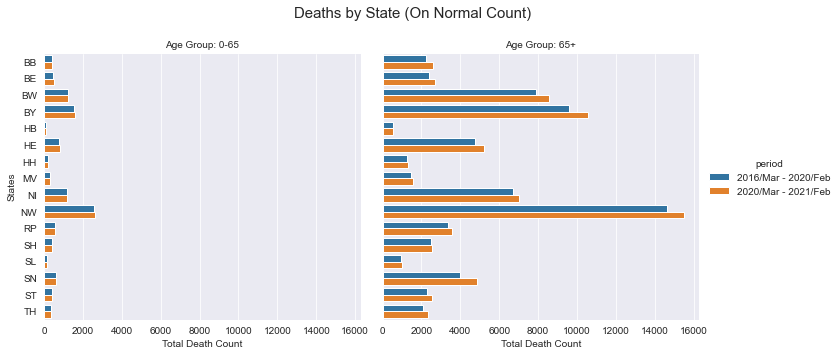

In [66]:
sns.set_style('darkgrid')

p1 = (sns.catplot(x='value', y='state_abbrv',
            hue='period', col='age',
            data=temp1, ci=None, kind='bar').set_axis_labels("Total Death Count", "States")
            .set_titles("Age Group: {col_name}")
)
p1.fig.subplots_adjust(top=.85)
p1.fig.suptitle("Deaths by State (On Normal Count)", fontsize=15)
plt.show()
# mplcursors.cursor(hover=True)

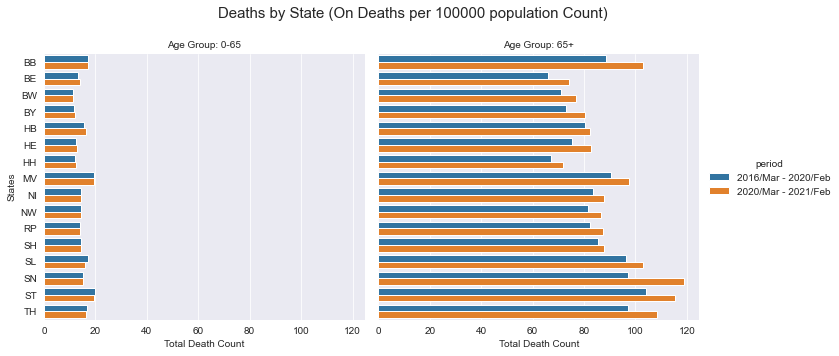

In [67]:
p2 = (sns.catplot(x='value', y='state_abbrv',
            hue='period', col='age',
            data=temp2, ci=None, kind='bar').set_axis_labels("Total Death Count", "States")
            .set_titles("Age Group: {col_name}")
)
p2.fig.subplots_adjust(top=.85)
p2.fig.suptitle("Deaths by State (On Deaths per 100000 population Count)", fontsize=15)
plt.show()

## Deaths by state and population density

In [68]:
# Data Aggregation 
data_dpp = data.groupby(['state_abbrv', 'period'], as_index=False).agg(deaths=('deaths','sum'), 
                                                                       pop_density= ('pop_density','min'), 
                                                                       population= ('population','min'))
                                                                       
# Again creating a new measure (Deaths per 100,000 population).
data_dpp['deaths_per_pop'] = data_dpp['deaths'] / data_dpp['population'] * 100000
display(data_dpp.head())


,state_abbrv,period,deaths,pop_density,population,deaths_per_pop
0,BB,2016/Mar - 2020/Feb,2663.979167,85.0,2521893.0,105.634108
1,BB,2020/Mar - 2021/Feb,3033.416667,85.0,2521893.0,120.283322
2,BE,2016/Mar - 2020/Feb,2899.520833,4090.0,3669491.0,79.016976
3,BE,2020/Mar - 2021/Feb,3232.583333,4090.0,3669491.0,88.093508
4,BW,2016/Mar - 2020/Feb,9155.333333,311.0,11100394.0,82.477553


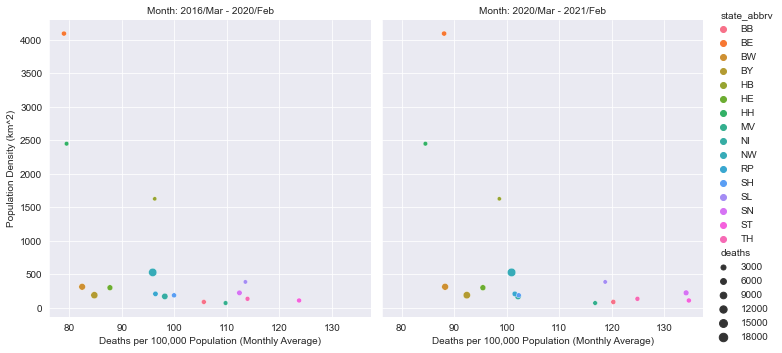

In [69]:
(sns.relplot(x='deaths_per_pop', y='pop_density',
             hue='state_abbrv', col = 'period', col_wrap=2, size = 'deaths', data=data_dpp)
.set(xlabel='Deaths per 100,000 Population (Monthly Average)', ylabel='Population Density (km^2)')
.set_titles('Month: {col_name}'))
plt.show()

In [70]:
# Redesining the dataframe to get the desired output.
data_dpp = data_dpp.pivot(index=['state_abbrv', 'pop_density'], columns = ['period'], values=['deaths', 'deaths_per_pop'])

# Defining Column names.
data_dpp.columns = ['deaths_pre_covid_period', 
                    'deaths_covid_period',
                    'deaths_per_pop_pre_covid_period', 
                    'deaths_per_pop_covid_period']

# Reseting the index.
data_dpp = data_dpp.reset_index()

# Adding a new column for mortality increase.
data_dpp['incr_mortality'] = (data_dpp.deaths_covid_period)/(data_dpp.deaths_pre_covid_period)-1
display(data_dpp.head())

,state_abbrv,pop_density,deaths_pre_covid_period,deaths_covid_period,deaths_per_pop_pre_covid_period,deaths_per_pop_covid_period,incr_mortality
0,BB,85.0,2663.979167,3033.416667,105.634108,120.283322,0.138679
1,BE,4090.0,2899.520833,3232.583333,79.016976,88.093508,0.114868
2,BW,311.0,9155.333333,9799.500000,82.477553,88.280650,0.070360
3,BY,186.0,11129.937500,12128.916667,84.801223,92.412645,0.089756
4,HB,1624.0,655.916667,671.666667,96.288130,98.600219,0.024012
